In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa
import seaborn as sns
import scipy

np.set_printoptions(linewidth=np.inf,threshold=np.inf)
pd.set_option('display.max_rows', 50)
pd.set_option('display.min_rows', 50)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm


from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA


In [3]:
data_dir = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/data/voice_clip_selected/'
voice_clip_meta_data = pd.read_csv(data_dir+"voice_clip_meta_data.csv")
voice_feature = pd.read_csv(data_dir+"voice_feature_20241022.csv")

In [4]:
voice_feature.columns

Index(['f0_mean', 'f0_std', 'f0_var', 'f0_min', 'f0_max', 'f0_skew',
       'f0_kurtosis', 'zcr_mean', 'zcr_std', 'zcr_var', 'zcr_min', 'zcr_max',
       'zcr_skew', 'zcr_kurtosis', 'mfcc_00', 'mfcc_01', 'mfcc_02', 'mfcc_03',
       'mfcc_04', 'mfcc_05', 'mfcc_06', 'mfcc_07', 'mfcc_08', 'mfcc_09',
       'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13', 'mfcc_14', 'mfcc_15',
       'mfcc_16', 'mfcc_17', 'mfcc_18', 'mfcc_19', 'mfcc_20', 'mfcc_21',
       'mfcc_22', 'mfcc_23', 'mfcc_24', 'client_id', 'path', 'sentence_id',
       'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accents',
       'len_in_second', 'sampling_rate', 'array_size'],
      dtype='object')

In [5]:
age_name = ['teens', 'twenties','thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties','nineties']
age_value = range(1,10)
age_dict = dict(zip(age_name, age_value))
gender_name = ["male_masculine","female_feminine"]
gender_value = [0,1]
gender_dict = dict(zip(gender_name, gender_value))
voice_feature['age'] = voice_feature['age'].map(age_dict)
voice_feature['gender'] = voice_feature['gender'].map(gender_dict)

In [6]:
voice_feature.age.value_counts().sort_index(), voice_feature.gender.value_counts().sort_index()

(age
 1    2505
 2    5041
 3    4005
 4    2265
 5    1079
 6    1009
 7     690
 8      27
 9      89
 Name: count, dtype: int64,
 gender
 0    12329
 1     4381
 Name: count, dtype: int64)

<Axes: xlabel='age', ylabel='Count'>

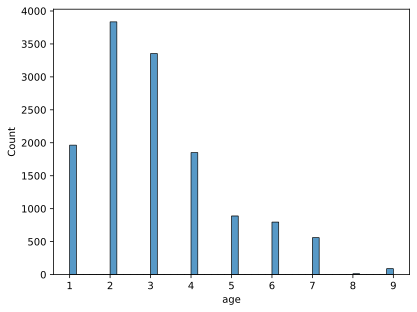

In [24]:
sns.histplot(data=voice_feature, x='age')

Name the set of voice features we want to use in classification.

In [7]:
col_list_mfcc = ['mfcc_00', 'mfcc_01', 'mfcc_02', 'mfcc_03', 'mfcc_04', 'mfcc_05',
       'mfcc_06', 'mfcc_07', 'mfcc_08', 'mfcc_09', 'mfcc_10', 'mfcc_11',
       'mfcc_12', 'mfcc_13', 'mfcc_14', 'mfcc_15', 'mfcc_16', 'mfcc_17',
       'mfcc_18', 'mfcc_19', 'mfcc_20', 'mfcc_21', 'mfcc_22', 'mfcc_23',
       'mfcc_24']
col_list_f0 = ['f0_mean', 'f0_std','f0_var','f0_min','f0_max','f0_skew', 'f0_kurtosis']
col_list_zcr = ['zcr_mean','zcr_std','zcr_var','zcr_min','zcr_max','zcr_skew','zcr_kurtosis']

Prepare the data:
* get the proper coloumns of the features we want to include in the classifier
* scale the features so that they may be in same range, to reduce the chance of some features overpowering other features due to different numerical scales. However, we may be selectively to do subset scaling, or experiment with diffrent scaling methods including non-scalign.
* set the target variable, the attribute we want to predict through the classifier
* split the data into training set and test set


In [25]:
X = voice_feature[col_list_f0 + col_list_mfcc + col_list_zcr]
feature_names = col_list_f0 + col_list_mfcc + col_list_zcr
scaler = preprocessing.MinMaxScaler().fit(X) # fits the Scaler object to X so that it works with the X data
X = scaler.transform(X) # applies the Scaler object to X so that x is scaled
y = voice_feature.gender

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.33, random_state=11)

Build the decision tree, with the method "DecisionTreeClassifier"


* pay attention to the parameter choices
  * criterion to use: "entropy", "gini"
  * max_depth
 

In [27]:
clf = DecisionTreeClassifier(criterion= "entropy", random_state=11,max_depth=4)
clf = clf.fit(X_train, y_train) #training stage

Measuring the quality of the classifier

In [30]:
score = clf.score(X_test, y_test)
cv_score = cross_val_score(clf, X_train, y_train, cv=11)
score, cv_score

(0.9262369496141625,
 array([0.92751843, 0.92742927, 0.93726937, 0.92496925, 0.93234932, 0.92742927, 0.91635916, 0.9298893 , 0.93726937, 0.93234932, 0.90651907]))

measuring the classifier performane on the unseen test set

<Figure size 6000x3000 with 0 Axes>

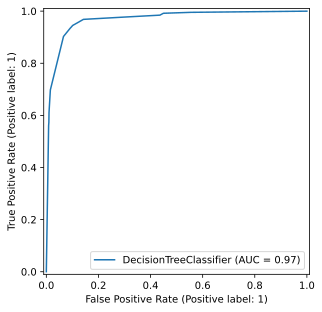

In [32]:
plt.figure(figsize= (10, 5))
metrics.RocCurveDisplay.from_estimator(
   clf, X_test, y_test)

make predictions on the test sets, observe the difference between the two AUC. 

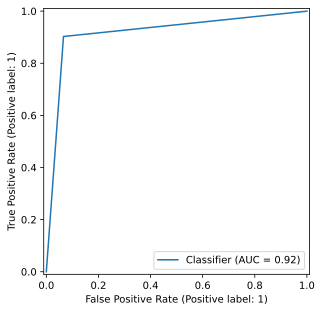

In [33]:
y_pred = clf.predict(X_test)
metrics.RocCurveDisplay.from_predictions(y_test,y_pred)

In [34]:
metrics.accuracy_score(y_test,y_pred)

0.9262369496141625

In [35]:
metrics.roc_curve(y_test,y_pred)

(array([0.        , 0.06587735, 1.        ]),
 array([0.       , 0.9028777, 1.       ]),
 array([inf,  1.,  0.]))

<BarContainer object of 39 artists>

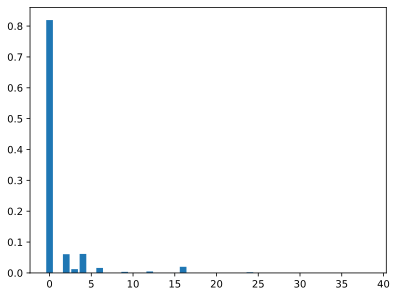

In [36]:
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)

We can examine the decision tree structure 

In [37]:
print(tree.export_text(clf,feature_names=col_list_f0 + col_list_mfcc+col_list_zcr))

|--- f0_mean <= 0.12
|   |--- f0_max <= 0.15
|   |   |--- mfcc_05 <= 0.51
|   |   |   |--- mfcc_02 <= 0.55
|   |   |   |   |--- class: 0
|   |   |   |--- mfcc_02 >  0.55
|   |   |   |   |--- class: 0
|   |   |--- mfcc_05 >  0.51
|   |   |   |--- mfcc_09 <= 0.58
|   |   |   |   |--- class: 0
|   |   |   |--- mfcc_09 >  0.58
|   |   |   |   |--- class: 0
|   |--- f0_max >  0.15
|   |   |--- f0_kurtosis <= 0.00
|   |   |   |--- f0_max <= 0.20
|   |   |   |   |--- class: 0
|   |   |   |--- f0_max >  0.20
|   |   |   |   |--- class: 1
|   |   |--- f0_kurtosis >  0.00
|   |   |   |--- f0_mean <= 0.10
|   |   |   |   |--- class: 0
|   |   |   |--- f0_mean >  0.10
|   |   |   |   |--- class: 0
|--- f0_mean >  0.12
|   |--- f0_mean <= 0.15
|   |   |--- f0_max <= 0.32
|   |   |   |--- mfcc_09 <= 0.23
|   |   |   |   |--- class: 0
|   |   |   |--- mfcc_09 >  0.23
|   |   |   |   |--- class: 1
|   |   |--- f0_max >  0.32
|   |   |   |--- mfcc_17 <= 0.52
|   |   |   |   |--- class: 0
|   |   |   |-

We can also plot the decision tree in a tree form

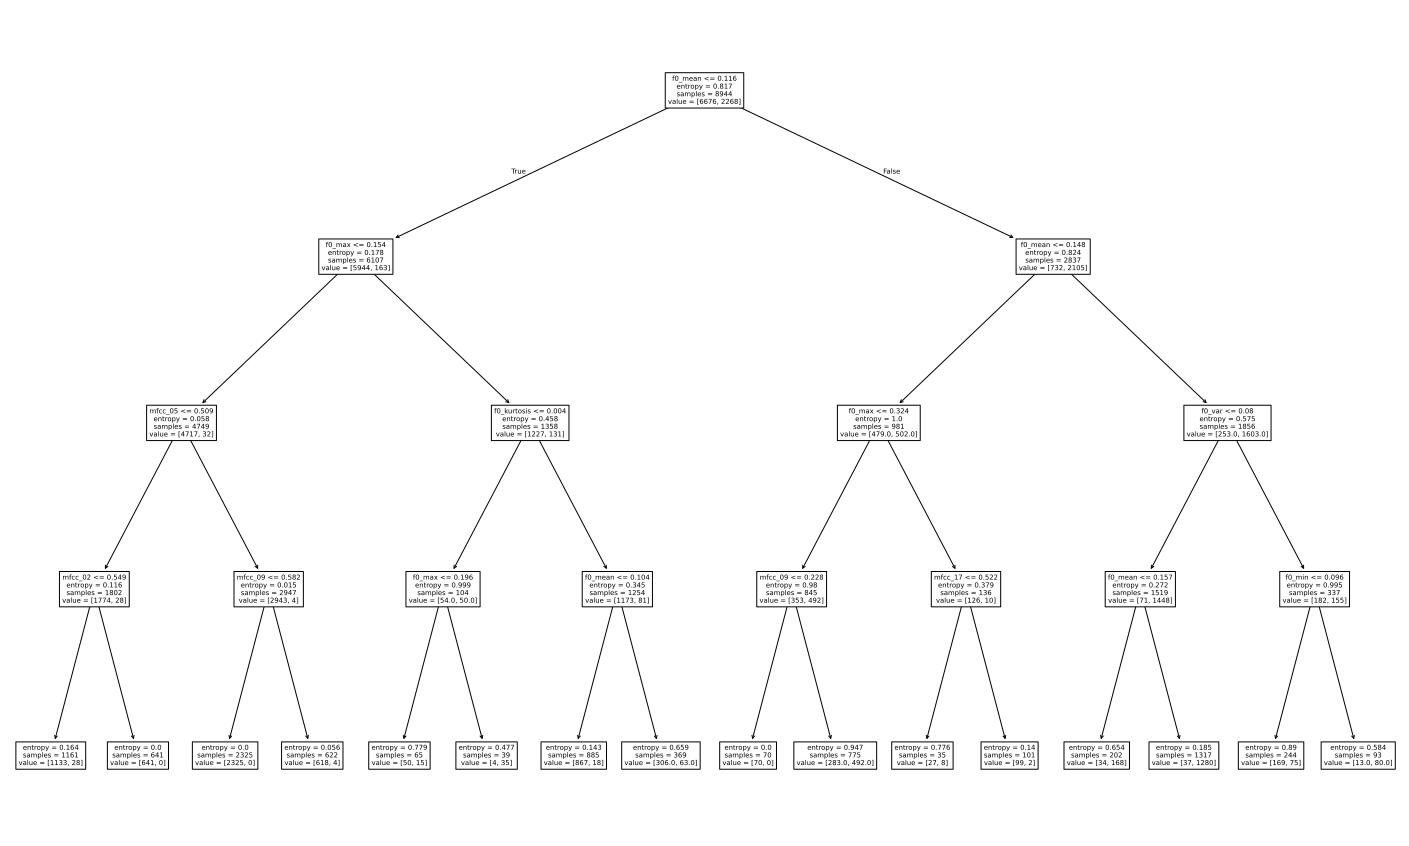

In [38]:
from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('svg')
#set_matplotlib_formats('pdf')
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

plt.rcParams['figure.dpi'] = 600
plt.figure(figsize=(25,15), dpi=600)
tree.plot_tree(clf, feature_names=col_list_f0 + col_list_mfcc+col_list_zcr, max_depth=4)
plt.show()

              precision    recall  f1-score   support

           0     0.9661    0.9341    0.9498      3294
           1     0.8223    0.9029    0.8607      1112

    accuracy                         0.9262      4406
   macro avg     0.8942    0.9185    0.9053      4406
weighted avg     0.9298    0.9262    0.9273      4406



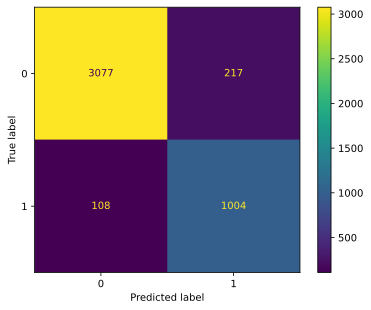

In [39]:
print(metrics.classification_report(y_test,y_pred, digits = 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

We can choose to work with top 7 accents, which amount to 67% of the total clips in our collection.

In [40]:
voice_feature.dropna(inplace=True)

              precision    recall  f1-score   support

           0     0.9792    0.9868    0.9830      3248
           1     0.9620    0.9413    0.9515      1158

    accuracy                         0.9748      4406
   macro avg     0.9706    0.9640    0.9673      4406
weighted avg     0.9747    0.9748    0.9747      4406



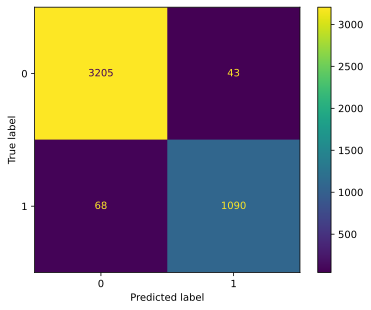

In [41]:
X = voice_feature[col_list_f0 + col_list_mfcc+col_list_zcr]
scaler = preprocessing.MinMaxScaler().fit(X)
X = scaler.transform(X)
y = voice_feature.gender

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.33, random_state=7)

mlp_clf = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=(500)).fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)
print(metrics.classification_report(y_test,y_pred, digits = 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

              precision    recall  f1-score   support

           0     0.9419    0.9781    0.9597      3248
           1     0.9313    0.8307    0.8781      1158

    accuracy                         0.9394      4406
   macro avg     0.9366    0.9044    0.9189      4406
weighted avg     0.9391    0.9394    0.9382      4406



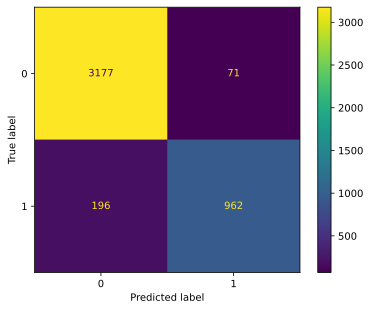

In [42]:
X = voice_feature[col_list_f0+col_list_mfcc]
scaler = preprocessing.MinMaxScaler().fit(X)
X = scaler.transform(X)
y = voice_feature.gender
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.33, random_state=7)
ridge_clf = RidgeClassifier(tol=1e-2, solver="svd")
ridge_clf = ridge_clf.fit(X_train, y_train)
y_pred = ridge_clf.predict(X_test)
print(metrics.classification_report(y_test,y_pred, digits = 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### gender classification accuracy
#### f0 mean + var + skew+ kurtosis, zcr mean, 40 mfcc
* f0 alone: 92
* f0+zcr: 93
* f0+ mfcc: 96.7%
* f0+mfcc+zcr: 97.43 (max_iter = 500)
* f0+mfcc+zcr: 97.59 (max_iter = 1000)

#### f0 and zcr mean, std, var, min, max, skew, kurtosis, 25 mfcc
* f0 alone: 93
* f0 + zcr: 94
* f0 + mfcc: 95.7
* f0 + mfcc+zcr: 96.4
* full set, mlp with (500,300) layers: 97.3

* using ridge: 92
* randomforest: 96, adjusting n_estimator and max_depth did not seem to improve much